Again, this code is coming mostly from the book "Grokking Machine Learning"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import random
import turicreate as tc

In [2]:
data = pd.DataFrame({
    "tjilp":[1,0,2,1,1,2,3,2,4,2,3,4,4,3],
    "mwah": [0,2,1,2,3,2,2,3,4,4,1,2,0,3],
    "mood": ["Sad", "Sad", "Sad", "Sad", "Happy", "Happy", "Sad", "Happy", "Happy", "Happy", "Sad", "Happy", "Happy","Sad"]
    })
data["label"]=data["mood"].apply(lambda x: 1 if x == "Happy" else 0)
happy_sentence = data[data["mood"] == "Happy"]
sad_sentence = data[data["mood"] == "Sad"]

In [3]:
data

,tjilp,mwah,mood,label
0,1,0,Sad,0
1,0,2,Sad,0
2,2,1,Sad,0
3,1,2,Sad,0
4,1,3,Happy,1
5,2,2,Happy,1
6,3,2,Sad,0
7,2,3,Happy,1
8,4,4,Happy,1
9,2,4,Happy,1


In [4]:
def sigmoid(x):
    return np.exp(x)/(1+np.exp(x))

def score(weights, bias, features):
    return np.dot(weights, features) + bias

def prediction(weights, bias, features):
    return sigmoid(score(weights, bias, features))

def log_loss(weights, bias, features, label):
    pred = prediction(weights, bias, features)
    return -label*np.log(pred) - (1-label)*np.log(1-pred)

def total_log_loss(weights, bias, features, labels):
    total_error = 0
    for i in range(len(features)):
        total_error += log_loss(weights, bias, features[i], labels[i])
    return total_error

def logistic_trick(weights, bias, features, label, learning_rate = 0.01):
    pred = prediction(weights, bias, features)
    for i in range(len(weights)):
        weights[i] += (label-pred)*features[i]*learning_rate
        bias += (label-pred)*learning_rate
    return weights, bias
 
def logistic_regression_algorithm(features, labels, learning_rate = 0.01, epochs = 1000):
    weights = [1 for i in range(len(features[0]))]
    bias = 0.0
    errors = []
    for i in range(epochs):
        errors.append(total_log_loss(weights, bias, features, labels))
        j = random.randint(0, len(features)-1)
        weights, bias = logistic_trick(weights, bias, features[j], labels[j])
    return weights, bias

In [5]:
features = data[["tjilp","mwah"]].to_numpy()
labels = data["label"].to_numpy()

In [6]:
found_weights, found_bias = logistic_regression_algorithm(features, labels)

In [7]:
def plot_sentiment(happy_data, sad_data, line = []):
    tick_spacing = 1
    fig, ax = plt.subplots(1,1)

    ax.scatter(happy_data["tjilp"], happy_data["mwah"], c='g',marker='o', label='Happy')
    ax.scatter(sad_data["tjilp"], sad_data["mwah"], c='r',marker='x', label='Sad')
    if line and len(line) > 1:
        ax.plot(line[0],line[1])
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    plt.title('Happy or Sad sentence')
    plt.ylabel('Mwah')
    plt.xlabel('Tjilp')
    plt.rcParams["figure.figsize"] = (8,6)
    plt.legend()
    plt.grid()
    plt.show()
    
def calculate_x2 (x1, weights, bias):
    return (-1*weights[0] * x1 - bias)/weights[1]

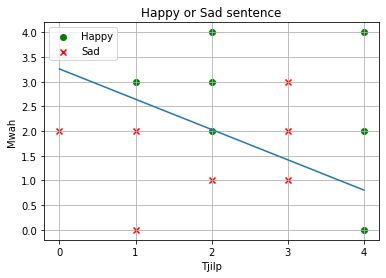

In [8]:
x_2_4 = calculate_x2(4,found_weights, found_bias)
x_2_0 = calculate_x2(0, found_weights, found_bias)
plot_sentiment(happy_sentence, sad_sentence, [[0, 4],[x_2_0, x_2_4]])